In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

s_p_500_data = '^GSPC.csv'
individual_data = 'all_stocks_5yr.csv'
individual_industry = '../s-and-p-500-companies-financials-master/data/constituents.csv'

s_p_df = pd.read_csv(s_p_500_data)
individual_df = pd.read_csv(individual_data)
industry_df = pd.read_csv(individual_industry)

In [2]:
individual_df.rename(columns = {'Name':'Symbol'}, inplace=True)

In [3]:
stocks_df = individual_df.merge(industry_df, on='Symbol')

In [4]:
stocks_df['Daily Change'] = stocks_df['close'] - stocks_df['open']
max_value = stocks_df['Daily Change'].max()
max_day_profit = stocks_df.loc[(stocks_df['Daily Change']==max_value)]
max_day_profit

,date,open,high,low,close,volume,Symbol,Name,Sector,Daily Change
47644,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN,Amazon.com Inc,Consumer Discretionary,81.38


In [5]:
group_by_individual = stocks_df.groupby('Symbol')
max_by_group_symbol = group_by_individual['Daily Change'].max()
max_daily_each = pd.DataFrame({'Max Increase': max_by_group_symbol})
max_daily_each = max_daily_each.reset_index()

In [6]:
m = max_daily_each.loc[max_daily_each['Symbol']=='PCLN']
m

,Symbol,Max Increase
360,PCLN,58.65


In [7]:
top_10_max = max_daily_each.sort_values('Max Increase', ascending=False).head(10)
top_10_max

,Symbol,Max Increase
38,AMZN,81.38
360,PCLN,58.65
206,GOOG,53.42
207,GOOGL,50.45
239,HUM,36.03
105,CMG,34.92
393,REGN,33.07
379,PRGO,30.30
58,AZO,27.72
69,BIIB,27.23


In [8]:
min_value = stocks_df['Daily Change'].min()
min_day_profit = stocks_df.loc[(stocks_df['Daily Change']==min_value)]
min_day_profit

,date,open,high,low,close,volume,Symbol,Name,Sector,Daily Change
441257,2017-11-07,1746.7,1748.0,1638.1,1645.72,3325104,PCLN,Priceline.com Inc,Consumer Discretionary,-100.98


In [9]:
min_by_group_symbol = group_by_individual['Daily Change'].min()
min_daily_each = pd.DataFrame({'Min Increase': min_by_group_symbol})
min_daily_each = min_daily_each.reset_index()
m2 = min_daily_each.loc[min_daily_each['Symbol']=='AMZN']
m2

,Symbol,Min Increase
38,AMZN,-55.0


In [10]:
top_10_min = min_daily_each.sort_values('Min Increase', ascending=True).head(10)
top_10_min

,Symbol,Min Increase
360,PCLN,-100.98
105,CMG,-75.81
38,AMZN,-55.00
206,GOOG,-43.27
393,REGN,-38.57
207,GOOGL,-38.22
69,BIIB,-36.47
58,AZO,-34.24
26,ALGN,-32.03
325,MTD,-30.84


Text(0.5, 1.0, 'S&P 500')

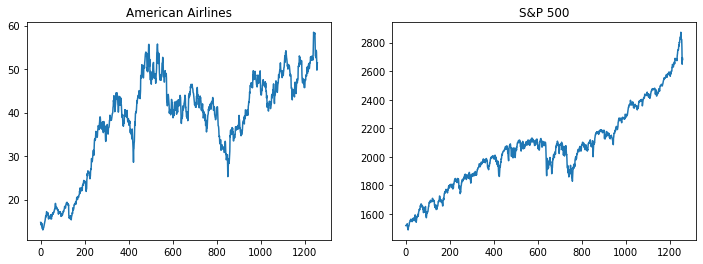

In [11]:
AAL_data = individual_df[individual_df['Symbol']=='AAL']
AAL_data

x_axis= np.arange(len(AAL_data))

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x_axis, AAL_data['close'])
ax1.set_title('American Airlines')

ax2=fig.add_subplot(1,2,2)
ax2.plot(x_axis, s_p_df['Close'])
ax2.set_title('S&P 500')

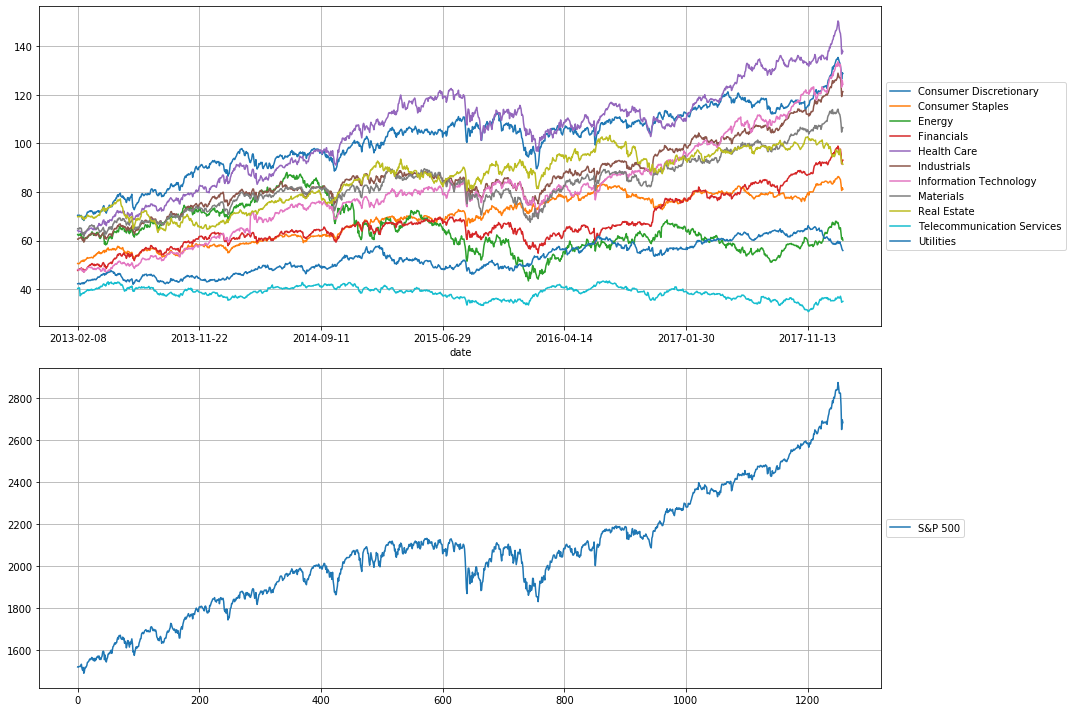

In [12]:
sector_df = stocks_df.groupby(['Sector','date'])['close'].mean()

sector = pd.DataFrame(sector_df)
sector = sector.unstack(level=0)
sector.columns = sector.columns.droplevel()
sector

# axis = np.arange(len(sector))
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sector.plot(ax=ax1)
ax2.plot(x_axis, s_p_df['Close'], label="S&P 500")

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.grid()
ax2.grid()
plt.tight_layout()

In [13]:
s_p = pd.DataFrame({'date': s_p_df['Date'],
                   'close':s_p_df['Close']})

ticker_df = stocks_df.groupby(['Symbol','date'])['close'].mean()
ticker = pd.DataFrame(ticker_df)
ticker = ticker.unstack(level=0)
ticker.columns = ticker.columns.droplevel()
ticker = ticker.reset_index()
ticker

merge_w_s_p_500 = ticker.merge(s_p, on='date')
merge_w_s_p_500.rename(columns={'close':'S&P'}, inplace=True)

#ticker.corr()
#ticker.merge(s_p_df['Close'], on='date')

#fig = plt.figure(figsize = (15,20))
#ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)

#ticker.plot(ax=ax1)
#ax2.plot(x_axis, s_p_df['Close'], label="S&P 500")

#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax1.grid()

#plt.scatter(ticker['IBM'], s_p_df['Close'])
#np.corrcoef(ticker, s_p_df['Close'])

merge_w_s_p_500.corr()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS,S&P
A,1.000000,0.215610,-0.494130,0.400368,0.509901,-0.203687,0.418756,0.396183,0.563067,0.528455,...,0.713500,0.209477,0.151394,-0.286090,0.642727,-0.030249,0.235464,0.710644,0.374168,0.507865
AAL,0.215610,1.000000,0.535983,0.835114,0.723115,0.773192,0.760103,0.630869,0.685319,0.693745,...,0.553129,-0.309139,0.665504,0.008729,0.641955,0.218472,0.772007,0.519378,0.695370,0.813935
AAP,-0.494130,0.535983,1.000000,0.264125,0.131630,0.701997,0.163286,0.196554,0.091777,0.105304,...,-0.104707,-0.230396,0.469657,0.239541,0.040747,0.248917,0.499423,-0.136549,0.186245,0.255991
AAPL,0.400368,0.835114,0.264125,1.000000,0.887866,0.673544,0.894304,0.848683,0.906094,0.914892,...,0.762623,-0.525019,0.768427,-0.355464,0.831831,0.249553,0.778762,0.755852,0.928463,0.954735
ABBV,0.509901,0.723115,0.131630,0.887866,1.000000,0.544060,0.921130,0.852036,0.897021,0.850391,...,0.771599,-0.369390,0.707035,-0.312927,0.871420,0.379140,0.719369,0.748906,0.898333,0.918636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.030249,0.218472,0.248917,0.249553,0.379140,0.457085,0.423444,0.223105,0.177472,0.133534,...,0.036854,-0.032145,0.229950,0.208164,0.188057,1.000000,0.458629,-0.062778,0.248900,0.246819
ZBH,0.235464,0.772007,0.499423,0.778762,0.719369,0.673967,0.676768,0.712794,0.719086,0.697958,...,0.559097,-0.260664,0.789335,-0.120766,0.717970,0.458629,1.000000,0.470557,0.754990,0.827627
ZION,0.710644,0.519378,-0.136549,0.755852,0.748906,0.179722,0.655322,0.772011,0.847317,0.900543,...,0.905506,-0.294837,0.532389,-0.613285,0.850119,-0.062778,0.470557,1.000000,0.780981,0.825829
ZTS,0.374168,0.695370,0.186245,0.928463,0.898333,0.554680,0.827169,0.951689,0.950264,0.930178,...,0.806847,-0.591037,0.838704,-0.557806,0.894304,0.248900,0.754990,0.780981,1.000000,0.943207


In [14]:
stocks_df_df = pd.DataFrame({'open':ticker_df})
stocks_df_df

open
Symbol date             
A      2013-02-08  45.08
       2013-02-11  44.60
       2013-02-12  44.62
       2013-02-13  44.75
       2013-02-14  44.58
...                  ...
ZTS    2018-02-01  77.82
       2018-02-02  76.78
       2018-02-05  73.83
       2018-02-06  73.27
       2018-02-07  73.86

[619040 rows x 1 columns]

In [15]:
s_p_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-02-08,1509.390015,1518.310059,1509.390015,1517.930054,1517.930054,2986150000
1,2013-02-11,1517.930054,1518.310059,1513.609985,1517.010010,1517.010010,2684100000
2,2013-02-12,1517.010010,1522.290039,1515.609985,1519.430054,1519.430054,3414370000
3,2013-02-13,1519.430054,1524.689941,1515.930054,1520.329956,1520.329956,3385880000
4,2013-02-14,1520.329956,1523.140015,1514.020020,1521.380005,1521.380005,3759740000
...,...,...,...,...,...,...,...
1254,2018-02-01,2816.449951,2835.959961,2812.699951,2821.979980,2821.979980,3938450000
1255,2018-02-02,2808.919922,2808.919922,2759.969971,2762.129883,2762.129883,4301130000
1256,2018-02-05,2741.060059,2763.389893,2638.169922,2648.939941,2648.939941,5283460000
1257,2018-02-06,2614.780029,2701.040039,2593.070068,2695.139893,2695.139893,5891660000


In [16]:
stocks_df

,date,open,high,low,close,volume,Symbol,Name,Sector,Daily Change
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,American Airlines Group,Industrials,-0.32
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,American Airlines Group,Industrials,-0.43
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,American Airlines Group,Industrials,-0.18
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,American Airlines Group,Industrials,0.36
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,American Airlines Group,Industrials,-0.95
...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,Zoetis,Health Care,0.98
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,Zoetis,Health Care,-0.75
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,Zoetis,Health Care,-2.81
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,Zoetis,Health Care,0.53


In [17]:
stocks_df['date'] = pd.to_datetime(stocks_df['date'])
stocks_df['Week_number'] = stocks_df['date'].dt.week
stocks_df['Year'] = stocks_df['date'].dt.year
stocks_df_week = stocks_df.groupby(['Symbol','Year','Week_number']).agg({'open':'first','close':'last'})
stocks_df_week.head(10)


open  close
Symbol Year Week_number              
A      2013 1            57.05  57.19
            6            45.07  45.08
            7            45.17  42.25
            8            42.21  41.80
            9            42.09  41.93
            10           41.75  43.03
            11           42.99  43.01
            12           42.46  41.25
            13           41.49  41.97
            14           41.83  41.54

In [18]:
stocks_df.loc[stocks_df['date'] == '2014-08-25']

,date,open,high,low,close,volume,Symbol,Name,Sector,Daily Change,Week_number,Year
388,2014-08-25,40.23,40.28,39.40,39.42,7075596,AAL,American Airlines Group,Industrials,-0.81,35,2014
1647,2014-08-25,101.79,102.17,101.28,101.54,40270173,AAPL,Apple Inc.,Information Technology,-0.25,35,2014
2906,2014-08-25,136.15,136.96,135.61,136.33,432480,AAP,Advance Auto Parts,Consumer Discretionary,0.18,35,2014
4165,2014-08-25,55.38,55.92,55.18,55.87,7553500,ABBV,AbbVie Inc.,Health Care,0.49,35,2014
5424,2014-08-25,77.03,77.29,76.67,76.92,454559,ABC,AmerisourceBergen Corp,Health Care,-0.11,35,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
613133,2014-08-25,37.59,37.88,37.43,37.82,402715,XYL,Xylem Inc.,Industrials,0.23,35,2014
614392,2014-08-25,72.75,73.11,72.55,72.77,2227424,YUM,Yum! Brands Inc,Consumer Discretionary,0.02,35,2014
615651,2014-08-25,100.24,101.04,99.98,100.46,669786,ZBH,Zimmer Biomet Holdings,Health Care,0.22,35,2014
616910,2014-08-25,28.93,29.37,28.93,29.15,1342479,ZION,Zions Bancorp,Financials,0.22,35,2014


In [19]:
stocks_df_week = stocks_df_week.reset_index()
stocks_df_week

,Symbol,Year,Week_number,open,close
0,A,2013,1,57.05,57.19
1,A,2013,6,45.07,45.08
2,A,2013,7,45.17,42.25
3,A,2013,8,42.21,41.80
4,A,2013,9,42.09,41.93
...,...,...,...,...,...
129317,ZTS,2018,2,73.43,75.39
129318,ZTS,2018,3,76.06,76.62
129319,ZTS,2018,4,76.67,80.09
129320,ZTS,2018,5,79.81,76.78


In [20]:
week_2015 = stocks_df_week.loc[(stocks_df_week['Week_number']==10) & (stocks_df_week['Year']==2015)]
week_2016 = stocks_df_week.loc[(stocks_df_week['Week_number']==34) & (stocks_df_week['Year']==2016)]
week_2017 = stocks_df_week.loc[(stocks_df_week['Week_number']==23) & (stocks_df_week['Year']==2017)]
week_2018 = stocks_df_week.loc[(stocks_df_week['Week_number']==4) & (stocks_df_week['Year']==2018)]
week_2013 = stocks_df_week.loc[(stocks_df_week['Week_number']==10) & (stocks_df_week['Year']==2013)]
week_2014 = stocks_df_week.loc[(stocks_df_week['Week_number']==35) & (stocks_df_week['Year']==2014)]


In [21]:
week_2015['max_change_2015'] = round(week_2015['close'] - week_2015['open'],2)
week_2015_max = week_2015['max_change_2015'].max()
week_2015.loc[week_2015['max_change_2015'] == week_2015_max]

/Users/BenoitViollier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Symbol,Year,Week_number,open,close,max_change_2015
28985,COO,2015,10,164.34,180.26,15.92


In [22]:
week_2016['max_change_2016'] = round(week_2016['close'] - week_2016['open'],2)
week_2016_max = week_2016['max_change_2016'].max()
week_2016.loc[week_2016['max_change_2016'] == week_2016_max]

/Users/BenoitViollier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Symbol,Year,Week_number,open,close,max_change_2016
26958,CMG,2016,34,389.0,418.75,29.75


In [23]:
week_2017['max_change_2017'] = round(week_2017['close'] - week_2017['open'],2)
week_2017_max = week_2017['max_change_2017'].max()
week_2017.loc[week_2017['max_change_2017'] == week_2017_max]

/Users/BenoitViollier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Symbol,Year,Week_number,open,close,max_change_2017
14924,AYI,2017,23,166.89,177.18,10.29


In [24]:
week_2018['max_change_2018'] = round(week_2018['close'] - week_2018['open'],2)
week_2018_max = week_2018['max_change_2018'].max()
week_2018.loc[week_2018['max_change_2018'] == week_2018_max]

/Users/BenoitViollier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Symbol,Year,Week_number,open,close,max_change_2018
10213,AMZN,2018,4,1297.17,1402.05,104.88


In [25]:
week_2013['max_change_2013'] = round(week_2013['close'] - week_2013['open'],2)
week_2013_max = week_2013['max_change_2013'].max()
week_2013.loc[week_2013['max_change_2013'] == week_2013_max]

/Users/BenoitViollier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Symbol,Year,Week_number,open,close,max_change_2013
91940,PCLN,2013,10,694.55,720.92,26.37


In [26]:
week_2014['max_change_2014'] = round(week_2014['close'] - week_2014['open'],2)
week_2014_max = week_2014['max_change_2014'].max()
week_2014.loc[week_2014['max_change_2014'] == week_2014_max]

/Users/BenoitViollier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Symbol,Year,Week_number,open,close,max_change_2014
105466,SIG,2014,35,107.63,117.87,10.24


In [27]:
stocks_df['date'] = pd.to_datetime(stocks_df['date'])
stocks_df['Month_number'] = stocks_df['date'].dt.month
stocks_df['Year'] = stocks_df['date'].dt.year
stocks_df_month = stocks_df.groupby(['Symbol','Year','Sector','Month_number']).agg({'open':'first','close':'last'})
#stocks_df_month.dtypes

In [28]:
stocks_df_month = stocks_df_month.reset_index()
stocks_df_month['Monthly Change'] = stocks_df_month['close'] - stocks_df_month['open']
stocks_df_month = stocks_df_month.groupby(['Sector','Year','Month_number'])['Monthly Change'].mean()
#stocks_df_month.dtypes

In [29]:
stocks_month = pd.DataFrame(stocks_df_month)
#stocks_month = stocks_month.unstack(level=0)
stocks_month = stocks_month.reset_index()
#df.YEAR.astype(str) + '/' + df.MONTH.astype(str)

#stocks_month['Year-Month'] = stocks_month['Year'].astype(str) + "-" + stocks_month['Month_number'].astype(str)
year_month_df=pd.DataFrame({'year': stocks_month['Year'], 'month': stocks_month['Month_number'], 'day':[1 for x in range(671)]})
stocks_month['Year-Month']= pd.to_datetime(year_month_df)
stocks_month

,Sector,Year,Month_number,Monthly Change,Year-Month
0,Consumer Discretionary,2013,2,0.097999,2013-02-01
1,Consumer Discretionary,2013,3,2.510669,2013-03-01
2,Consumer Discretionary,2013,4,2.108521,2013-04-01
3,Consumer Discretionary,2013,5,2.704583,2013-05-01
4,Consumer Discretionary,2013,6,0.554804,2013-06-01
...,...,...,...,...,...
666,Utilities,2017,10,2.241071,2017-10-01
667,Utilities,2017,11,1.584286,2017-11-01
668,Utilities,2017,12,-4.409643,2017-12-01
669,Utilities,2018,1,-2.013929,2018-01-01


In [30]:
stocks_b

NameError: name 'stocks_b' is not defined

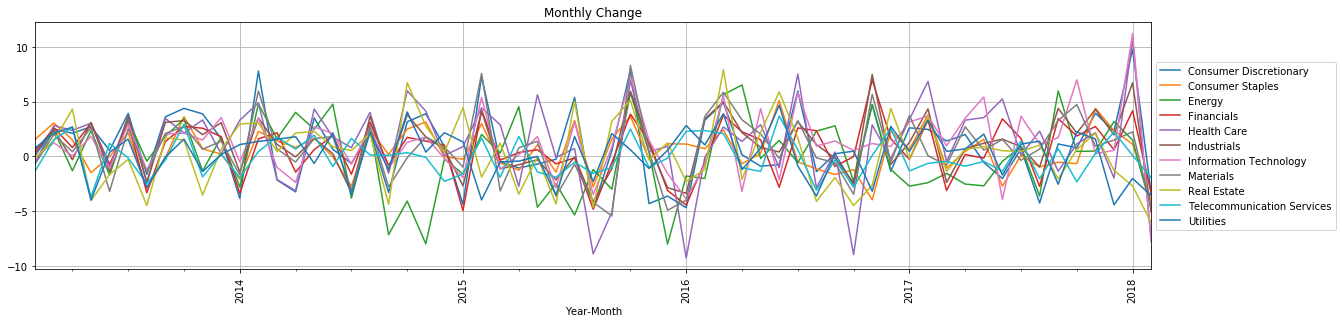

In [31]:
#stocks_month = pd.DataFrame(stocks_df_month)
#stocks_month = stocks_month.unstack(level=0)
#stocks_month = stocks_month.reset_index()

#df.YEAR.astype(str) + '/' + df.MONTH.astype(str)

#stocks_month['Year-Month'] = stocks_month['Year'].astype(str) + "-" + stocks_month['Month_number'].astype(str)
#plt.scatter(stocks_month['Year-Month'],stocks_month['Monthly Change'])
stocks_month.head()
stocks_month=stocks_month.groupby(['Sector','Year-Month'])['Monthly Change'].mean()

stocks_b = pd.DataFrame(stocks_month)
stocks_b =stocks_b.unstack(level=0)
stocks_b.columns = stocks_b.columns.droplevel()
stocks_b = stocks_b.reset_index()
stocks_b.set_index("Year-Month",inplace= True)
stocks_b

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)

stocks_b.plot(ax=ax1)
#ax2.plot(x_axis, s_p_df['Close'], label="S&P 500")

ax1.set_title('Monthly Change')
ax1,plt.xticks(rotation=90)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.grid()
#ax2.grid()
#plt.tight_layout()

In [ ]:

fig = plt.figure(figsize=(20,7))
plt.plot(stocks_b['Year-Month'], stocks_b['Energy'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
stocks_b['Year-Month'] = pd.to_datetime(stocks_b['Year-Month'])
stocks_b.head(24)

In [ ]:
plt.scatter

In [ ]:
stocks_df_month['Monthly Change'] = stocks_df_month['close'] - stocks_df_month['open']

In [ ]:
stocks_df_month = stocks_df_month.unstack(level=0)

In [ ]:
stocks_df_month.plot(type='scatter')

In [ ]:
s_p_df.head()

In [ ]:
SP_growth = []
for row in range(len(s_p_df)):
    growth2 = round(s_p_df['Close'][row] - s_p_df['Open'][row],3)
    SP_growth.append(growth2)

In [ ]:
SP_growth

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = np.arange(len(SP_growth))
plt.plot(ax, SP_growth)

In [ ]:
AAL = stocks_df[stocks_df['Symbol']=='AAL']
AAL

In [ ]:
AAL_growth = []
for row in range(len(AAL)):
    growth = round(AAL['close'][row] - AAL['open'][row],3)
    AAL_growth.append(growth)

In [ ]:
AAL_growth_df = pd.DataFrame(AAL_growth)
AAL_growth_df

In [ ]:
SP_growth_df = pd.DataFrame(SP_growth)
SP_growth_df

In [ ]:
x_ax = AAL_growth_df['O']
y_ax = SP_growth_df['O']
(slope, intercept, r_value, p_value, st_err) = st.linregress(x_ax,y_ax)
fit = x_ax * slope + intercept
plt.scatter(x_ax,y_ax)
plt.plot(x_ax,fit,'r',lw=2)



#fig = plt.figure(figsize=(15,7))
#ax = np.arange(len(AAL_growth))
#plt.scatter(AAL_growth,SP_growth)

In [ ]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(ax, AAL_growth, label='American Airline')
ax2.plot(ax, SP_growth, label="S&P 500")

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.grid()
ax2.grid()
plt.tight_layout()